## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

stats = pd.DataFrame(clean_data.groupby("Drug Regimen").count())

stats["Mean"] = pd.DataFrame(clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
stats["Median"] = pd.DataFrame(clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
stats["Standard Deviation"] = pd.DataFrame(clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
stats["Variance"] = pd.DataFrame(clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
stats["SEM"] = pd.DataFrame(clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Clean up columns, just keeping a count column for some of the graphs below
stats = stats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename count column
stats = stats.rename(columns = {"Mouse ID" : "Mouse Count"})
stats.head()


# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mouse Count,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_stats = clean_data[['Drug Regimen', 'Tumor Volume (mm3)']]

tumor_df = tumor_stats.groupby(["Drug Regimen"]).mean()
tumor_df = tumor_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
tumor_df['Std. Dev. Tumor Volume'] = tumor_stats.groupby(["Drug Regimen"]).std()
tumor_df['Median Tumor Volume'] = tumor_stats.groupby(["Drug Regimen"]).median()
tumor_df['Variance Tumor Volume'] = tumor_stats.groupby(["Drug Regimen"]).var()
tumor_df['SEM Tumor Volume'] = tumor_stats.groupby(["Drug Regimen"]).sem()
tumor_df


,Mean Tumor Volume,Std. Dev. Tumor Volume,Median Tumor Volume,Variance Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.320930,6.622085,50.446266,43.852013,0.544332
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


## Bar and Pie Charts

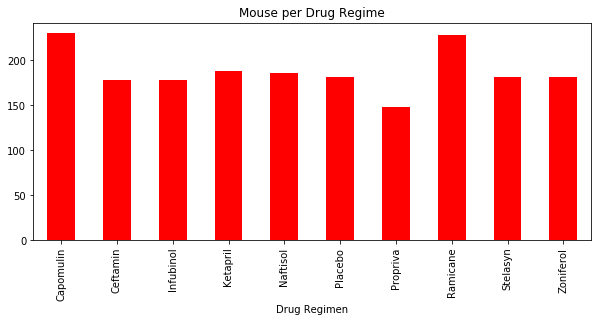

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_treatment = stats [["Mouse Count"]]
mouse_treatment.plot(kind="bar", figsize=(10,4), color = "r", legend=False)
plt.title("Mouse per Drug Regime")
plt.show()
plt.tight_layout()


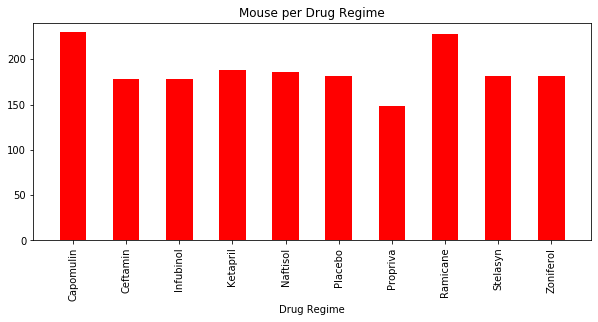

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mouse_treatment))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,4))
plt.bar(x_axis, mouse_treatment["Mouse Count"], color = "r", width = .5)
plt.xticks(tick_locations, mouse_treatment.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(mouse_treatment["Mouse Count"])+10)

# Set a Title and labels
plt.title("Mouse per Drug Regime")
plt.xlabel("Drug Regime")


# Save our graph and show the grap
plt.show()


In [11]:
gender_pie = clean_data.groupby(['Sex', 'Mouse ID']).size()
gender_pie = pd.DataFrame(gender_pie.groupby(['Sex']).count())
gender_pie.columns = ['Total Gender Count']
gender_pie['% of Gender'] = (100*(gender_pie['Total Gender Count']/gender_pie['Total Gender Count'].sum()))
gender_pie

,Total Gender Count,% of Gender
Sex,,
Female,123,49.596774
Male,125,50.403226


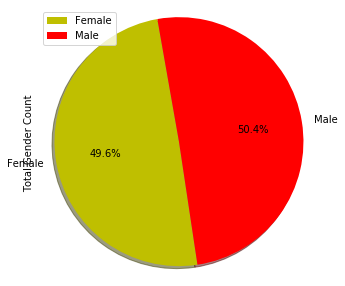

In [12]:






labels = ["Female", "Male"]
colors = ["y", "r"]
explode = (0.1, 0)

#plt.title
plot = gender_pie.plot.pie(y='Total Gender Count', figsize=(5, 5), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)
plot.legend(loc="upper left")
plot.axis("equal")
plt.show()


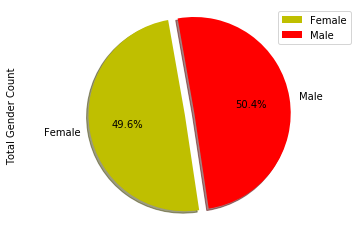

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
percent = [49.596774, 50.403226]
colors = ["y", "r"]
explode = (0.1, 0)
#plt.title
plt.pie(percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)
plt.legend(loc="best")
plt.ylabel("Total Gender Count")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

top_drugs = clean_data[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_drugs = top_drugs.sort_values(["Timepoint"], ascending=True)
top_drugs_final = top_drugs[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]
top_drugs_finals = pd.DataFrame(top_drugs_final)
top_drugs_finals.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
added_data = pd.merge(clean_data, top_drugs, how="left")
added_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = clean_data["Drug Regimen"]
for i in treatment: 
   print (i)
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []


Capomulin
Ketapril
Ketapril
Ketapril
Ketapril
Ketapril
Ketapril
Ketapril
Ketapril
Naftisol
Naftisol
Naftisol
Ketapril
Naftisol
Naftisol
Naftisol
Naftisol
Naftisol
Naftisol
Naftisol
Naftisol
Naftisol
Naftisol
Naftisol
Naftisol
Naftisol
Naftisol
Ketapril
Ketapril
Infubinol
Infubinol
Infubinol
Infubinol
Infubinol
Infubinol
Infubinol
Infubinol
Infubinol
Infubinol
Infubinol
Ketapril
Infubinol
Ketapril
Ketapril
Ketapril
Ketapril
Ketapril
Ketapril
Ketapril
Ketapril
Ketapril
Ketapril
Ketapril
Ketapril
Naftisol
Naftisol
Naftisol
Stelasyn
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Stelasyn
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Ramicane
Stelasyn
Stelasyn
Stelasyn
Naftisol
Naftisol
Naftisol
Naftisol
Naftisol
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Stelasyn
Infubi

In [33]:
Cap_quartiles = (top_drugs_finals.loc[top_drugs_finals["Drug Regimen"]== "Capomulin"]).quantile([.25,.5,.75]) 
Cap_lower_q = Cap_quartiles.loc[.25,"Tumor Volume (mm3)"]
Cap_upper_q = Cap_quartiles.loc[.75,"Tumor Volume (mm3)"]
Cap_iqr =  Cap_upper_q - Cap_lower_q
Cap_low_bd = Cap_lower_q - (1.5*Cap_iqr)
Cap_up_bd = Cap_upper_q + (1.5*Cap_iqr)


print(f"The Median for Capomulin: {Cap_quartiles}")
print(f"The Lower quartile for Capomulin: {Cap_lower_q}")
print(f"The Upper quartile for Capomulin: {Cap_upper_q}")
print(f"The Interquartile range for Capomulin: {Cap_iqr}")
print(f"The Lower bound for Capomulin: {Cap_low_bd}")
print(f"The Higher bound range for Capomulin: {Cap_up_bd}")

Capomulin_final_df = pd.DataFrame(Cap_quartiles)
Capomulin_final_df


The Median for Capomulin:       Tumor Volume (mm3)
0.25           37.685933
0.50           41.557809
0.75           45.000000
The Lower quartile for Capomulin: 37.685932865
The Upper quartile for Capomulin: 45.0
The Interquartile range for Capomulin: 7.314067135000002
The Lower bound for Capomulin: 26.714832162499995
The Higher bound range for Capomulin: 55.9711007025


,Tumor Volume (mm3)
0.25,37.685933
0.50,41.557809
0.75,45.000000


In [34]:
Ram_quartiles = (top_drugs_finals.loc[top_drugs_finals["Drug Regimen"]== "Ramicane"]).quantile([.25,.5,.75])
Ram_lower_q = Ram_quartiles.loc[.25,"Tumor Volume (mm3)"]
Ram_upper_q = Ram_quartiles.loc[.75,"Tumor Volume (mm3)"]
Ram_iqr =  Ram_upper_q - Ram_lower_q
Ram_lower_bd = Ram_lower_q - (1.5*Ram_iqr)
Ram_upper_bd = Ram_upper_q + (1.5*Ram_iqr)
Ram_upper_bd

print(f"The Median of Ramicane: {Ram_quartiles}")
print(f"The Lower quartile for Ramicane: {Ram_lower_q}")
print(f"The Upper quartile for Ramicane: {Ram_upper_q}")
print(f"The Interquartile range for Ramicane: {Ram_iqr}")
print(f"The Lower bound for Ramicane: {Ram_lower_bd}")
print(f"The Higher bound range for Ramicane: {Ram_upper_bd}")

Ramicane_final_df = pd.DataFrame(Ram_quartiles)
Ramicane_final_df

The Median of Ramicane:       Tumor Volume (mm3)
0.25           36.674635
0.50           40.673236
0.75           45.000000
The Lower quartile for Ramicane: 36.67463458499999
The Upper quartile for Ramicane: 45.0
The Interquartile range for Ramicane: 8.325365415000007
The Lower bound for Ramicane: 24.18658646249998
The Higher bound range for Ramicane: 57.48804812250001


,Tumor Volume (mm3)
0.25,36.674635
0.50,40.673236
0.75,45.000000


In [35]:
Ib_quartiles = (top_drugs_finals.loc[top_drugs_finals["Drug Regimen"]== "Infubinol"]).quantile([.25,.5,.75])
Ib_lower_q = Ib_quartiles.loc[.25,"Tumor Volume (mm3)"]
Ib_upper_q = Ib_quartiles.loc[.75,"Tumor Volume (mm3)"]
Ib_iqr =  Ib_upper_q - Ib_lower_q
Ib_lower_bd = Ib_lower_q - (1.5*Ib_iqr)
Ib_upper_bd = Ib_upper_q + (1.5*Ib_iqr)

print(f"The Median for Infubinol: {Ib_quartiles}")
print(f"The Lower quartile for Infubinol: {Ib_lower_q}")
print(f"The Upper quartile for Infubinol: {Ib_upper_q}")
print(f"The Interquartile range for Infubinol is: {Ib_iqr}")
print(f"The Lower bound of Infubinol: {Ib_lower_bd}")
print(f"The Higher bound range of Infubinol: {Ib_upper_bd}")

Infubinol_final_df = pd.DataFrame(Ib_quartiles)
Infubinol_final_df

The Median for Infubinol:       Tumor Volume (mm3)
0.25           47.312353
0.50           51.820584
0.75           57.314444
The Lower quartile for Infubinol: 47.3123533
The Upper quartile for Infubinol: 57.314443967500004
The Interquartile range for Infubinol is: 10.002090667500006
The Lower bound of Infubinol: 32.309217298749985
The Higher bound range of Infubinol: 72.31757996875001


,Tumor Volume (mm3)
0.25,47.312353
0.50,51.820584
0.75,57.314444


In [37]:
Ct_quartiles = (top_drugs_finals.loc[top_drugs_finals["Drug Regimen"]== "Ceftamin"]).quantile([.25,.5,.75])
Ct_lower_q = Ct_quartiles.loc[.25,"Tumor Volume (mm3)"]
Ct_upper_q = Ct_quartiles.loc[.75,"Tumor Volume (mm3)"]
Ct_iqr =  Ct_upper_q - Ct_lower_q
Ct_lower_bd = Ct_lower_q - (1.5*Ct_iqr)
Ct_upper_bd = Ct_upper_q + (1.5*Ct_iqr)

print(f"The Median for Ceftamin: {Ct_quartiles}")
print(f"The Lower quartile for Ceftamin: {Ct_lower_q}")
print(f"The Upper quartile for Ceftamin: {Ct_upper_q}")
print(f"The Interquartile range for Ceftamin: {Ct_iqr}")
print(f"The Lower bound for Ceftamin: {Ct_lower_bd}")
print(f"The Higher bound range for Ceftamin: {Ct_upper_bd}")

Ceftamin_final_df = pd.DataFrame(Ct_quartiles)
Ceftamin_final_df

The Median for Ceftamin:       Tumor Volume (mm3)
0.25           47.208427
0.50           51.776157
0.75           56.801438
The Lower quartile for Ceftamin: 47.208427112500004
The Upper quartile for Ceftamin: 56.801437570000004
The Interquartile range for Ceftamin: 9.5930104575
The Lower bound for Ceftamin: 32.818911426250004
The Higher bound range for Ceftamin: 71.19095325625


,Tumor Volume (mm3)
0.25,47.208427
0.50,51.776157
0.75,56.801438


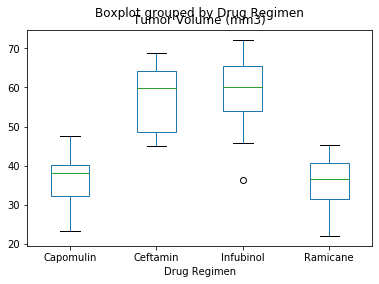

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_4 = top_drugs_finals.groupby(["Drug Regimen", "Mouse ID"]).last()['Tumor Volume (mm3)']
top_4_final_df = pd.DataFrame(final_4)
top_4_final_df.reset_index()

top_4_final_df.boxplot(by='Drug Regimen', column =['Tumor Volume (mm3)'], grid=False)
                                          
#plot.title("Tumor Volume")
#plot.xlabel("Drug Regimen")
#plot.ylabel("Final Tumor Volume (mm3)")
#plot.show()

## Line and Scatter Plots

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
